<a href="https://colab.research.google.com/github/vault5673/Classification-with-Logistic-Regression/blob/main/Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df= pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Cleaning and preprocessing

**our data is clean no missing values and features are correct tyes .so data cleaning is unnecessary and the dataset is small so if we remove outlier means i will reduce the dataset size and the model training is not efficient**

In [5]:
df.shape

(569, 33)

In [6]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


# Drop the unnecessary columns

In [7]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('id',axis=1,inplace=True)

# Data Visualizations

<ipython-input-8-b2e78112e041>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


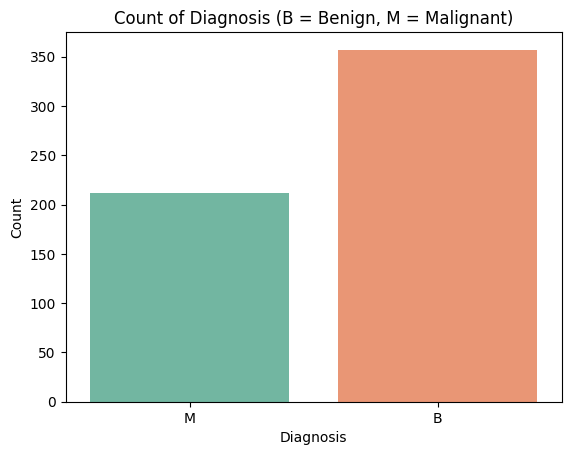

In [8]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title("Count of Diagnosis (B = Benign, M = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


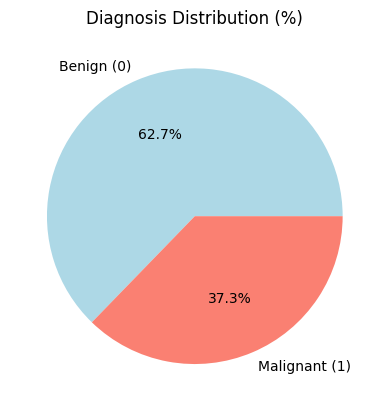

In [9]:
diagnosis_counts = df['diagnosis'].value_counts(normalize=True) * 100
print(diagnosis_counts)
diagnosis_counts.plot(kind='pie', labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Diagnosis Distribution (%)")
plt.ylabel("")
plt.show()

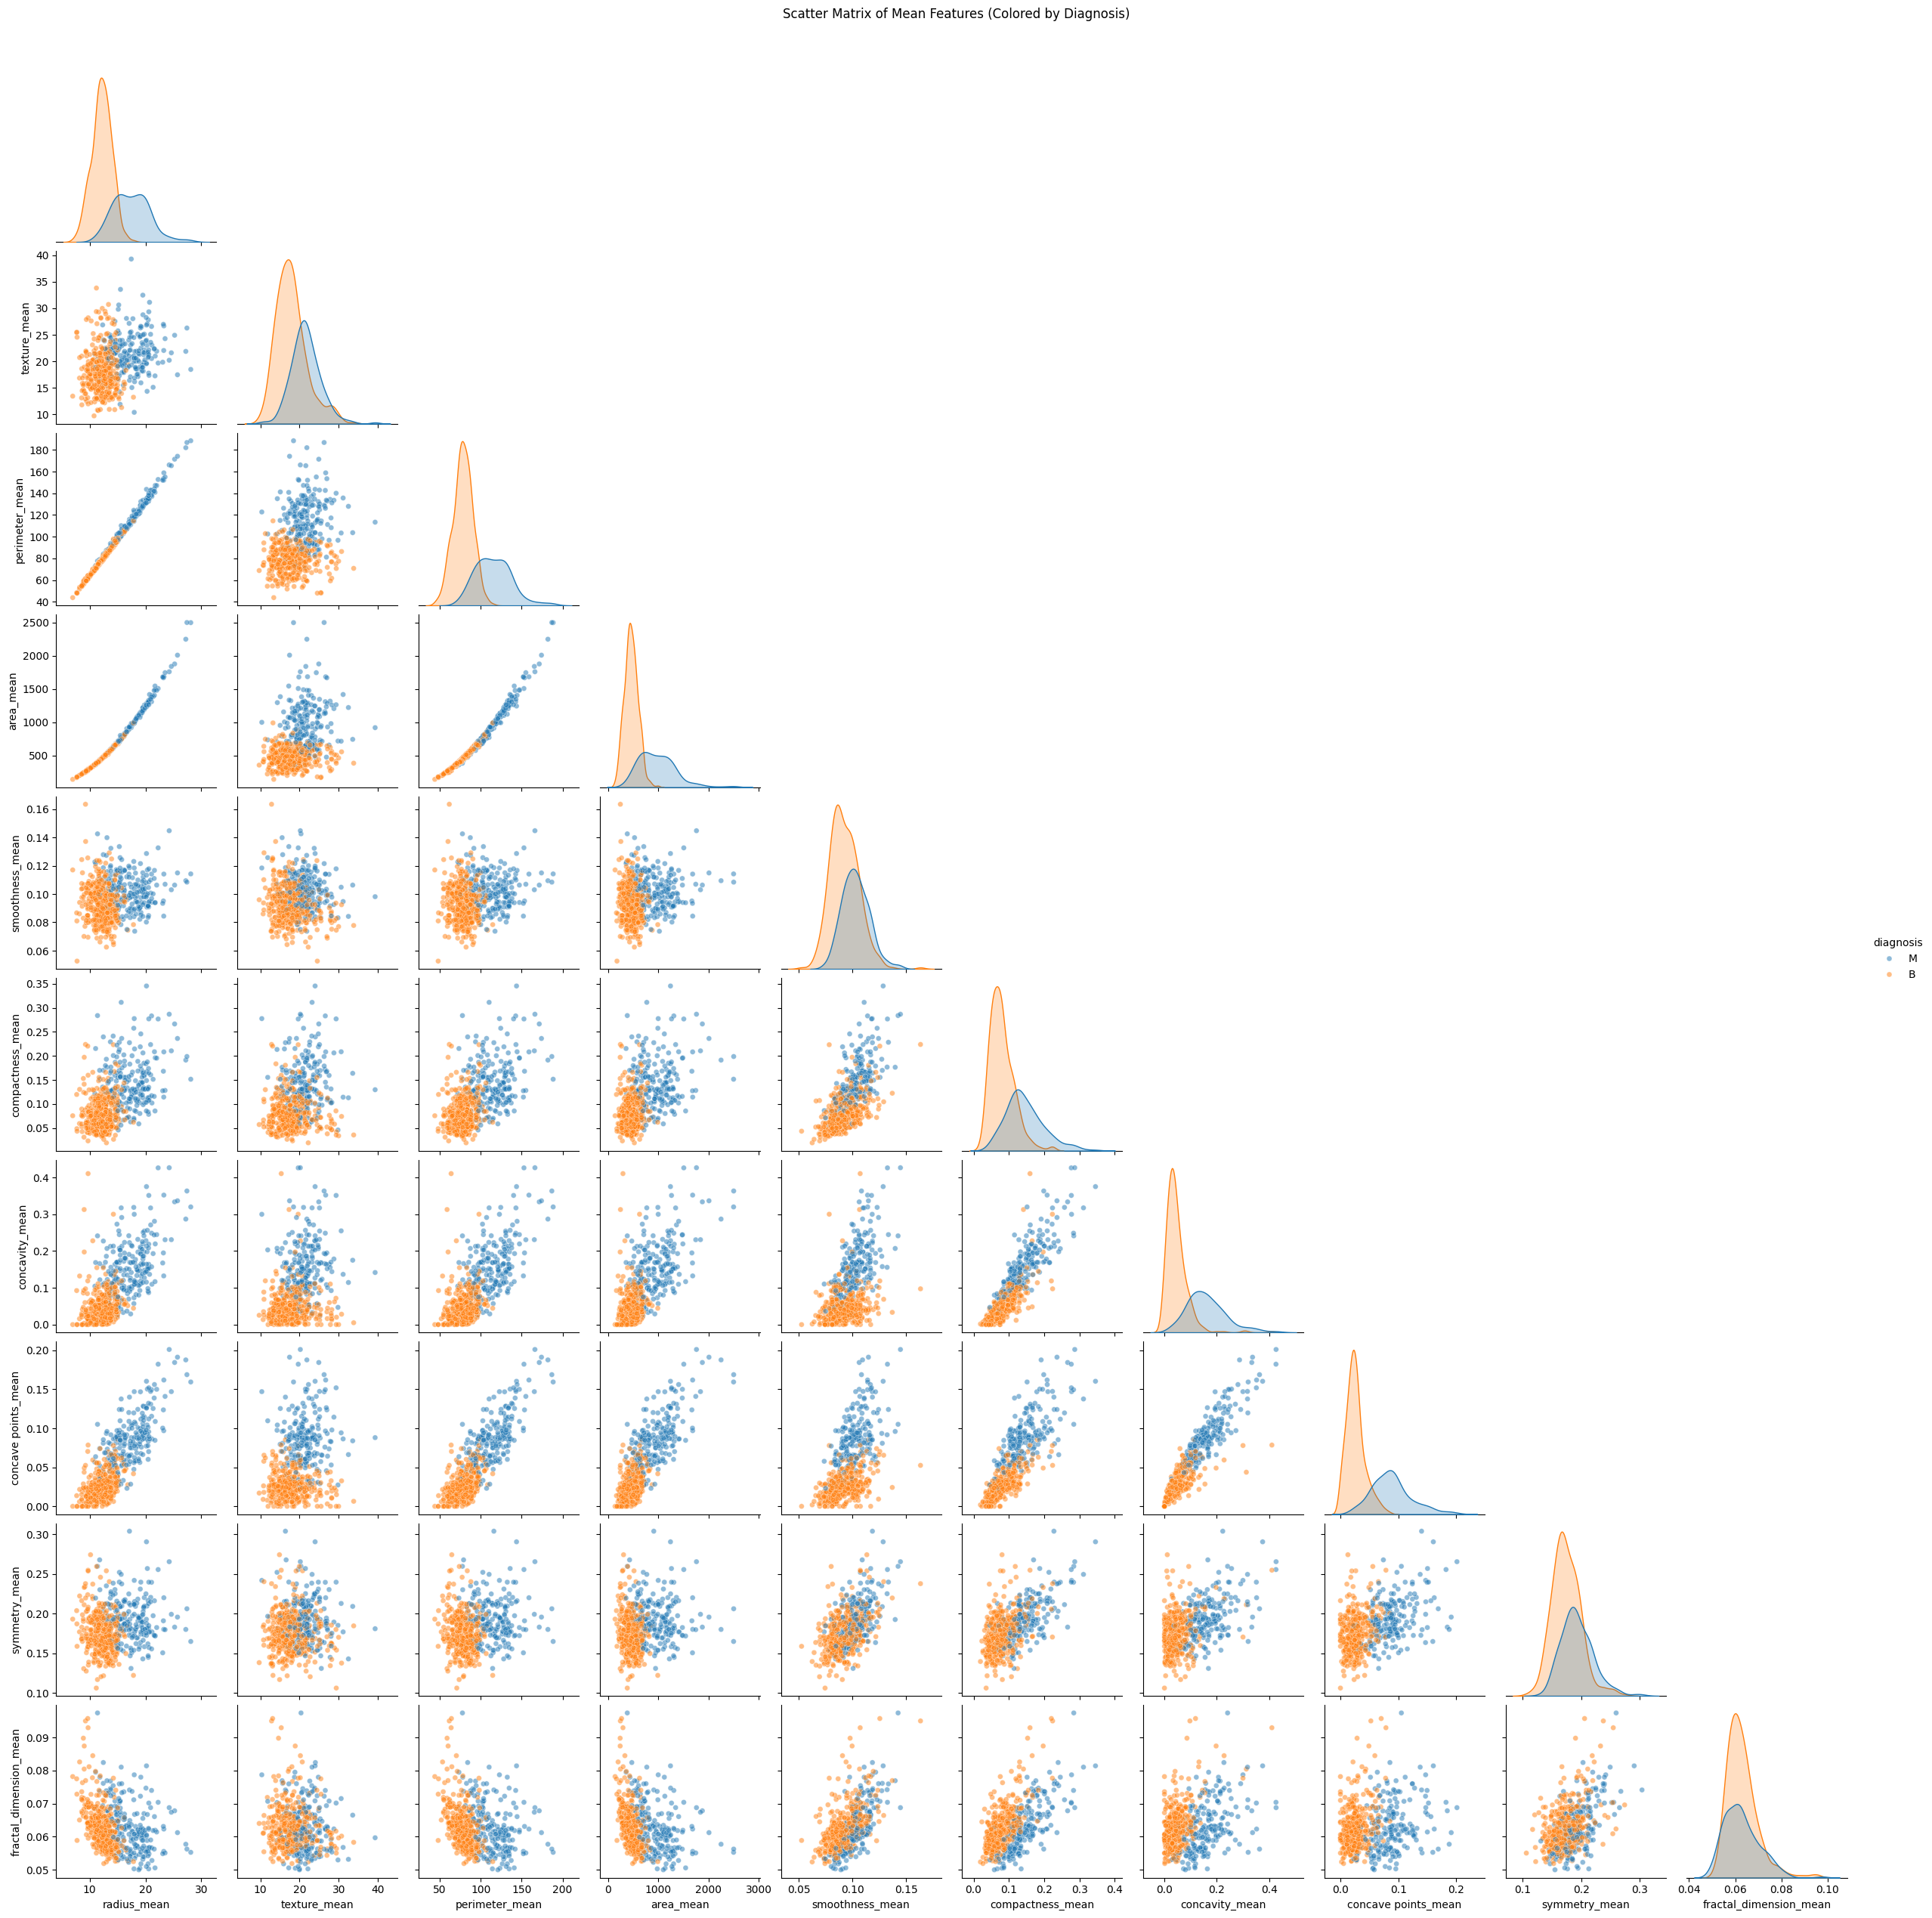

In [10]:
mean_cols = [col for col in df.columns if '_mean' in col]
df_mean = df[mean_cols + ['diagnosis']]
sns.pairplot(df_mean, hue='diagnosis', corner=True, plot_kws={'alpha': 0.5, 's': 25})
plt.suptitle("Scatter Matrix of Mean Features (Colored by Diagnosis)", y=1.02)
plt.show()

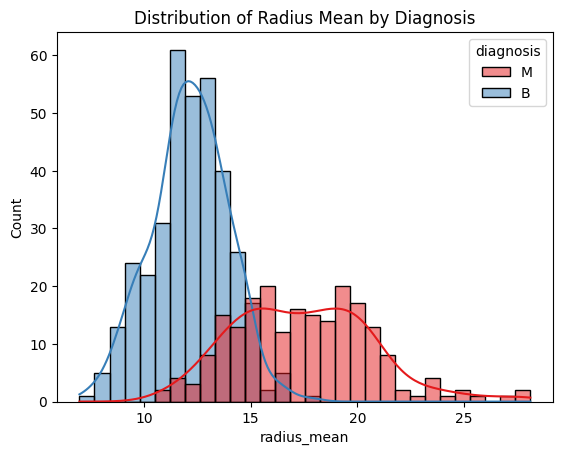

In [11]:
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title("Distribution of Radius Mean by Diagnosis")
plt.show()

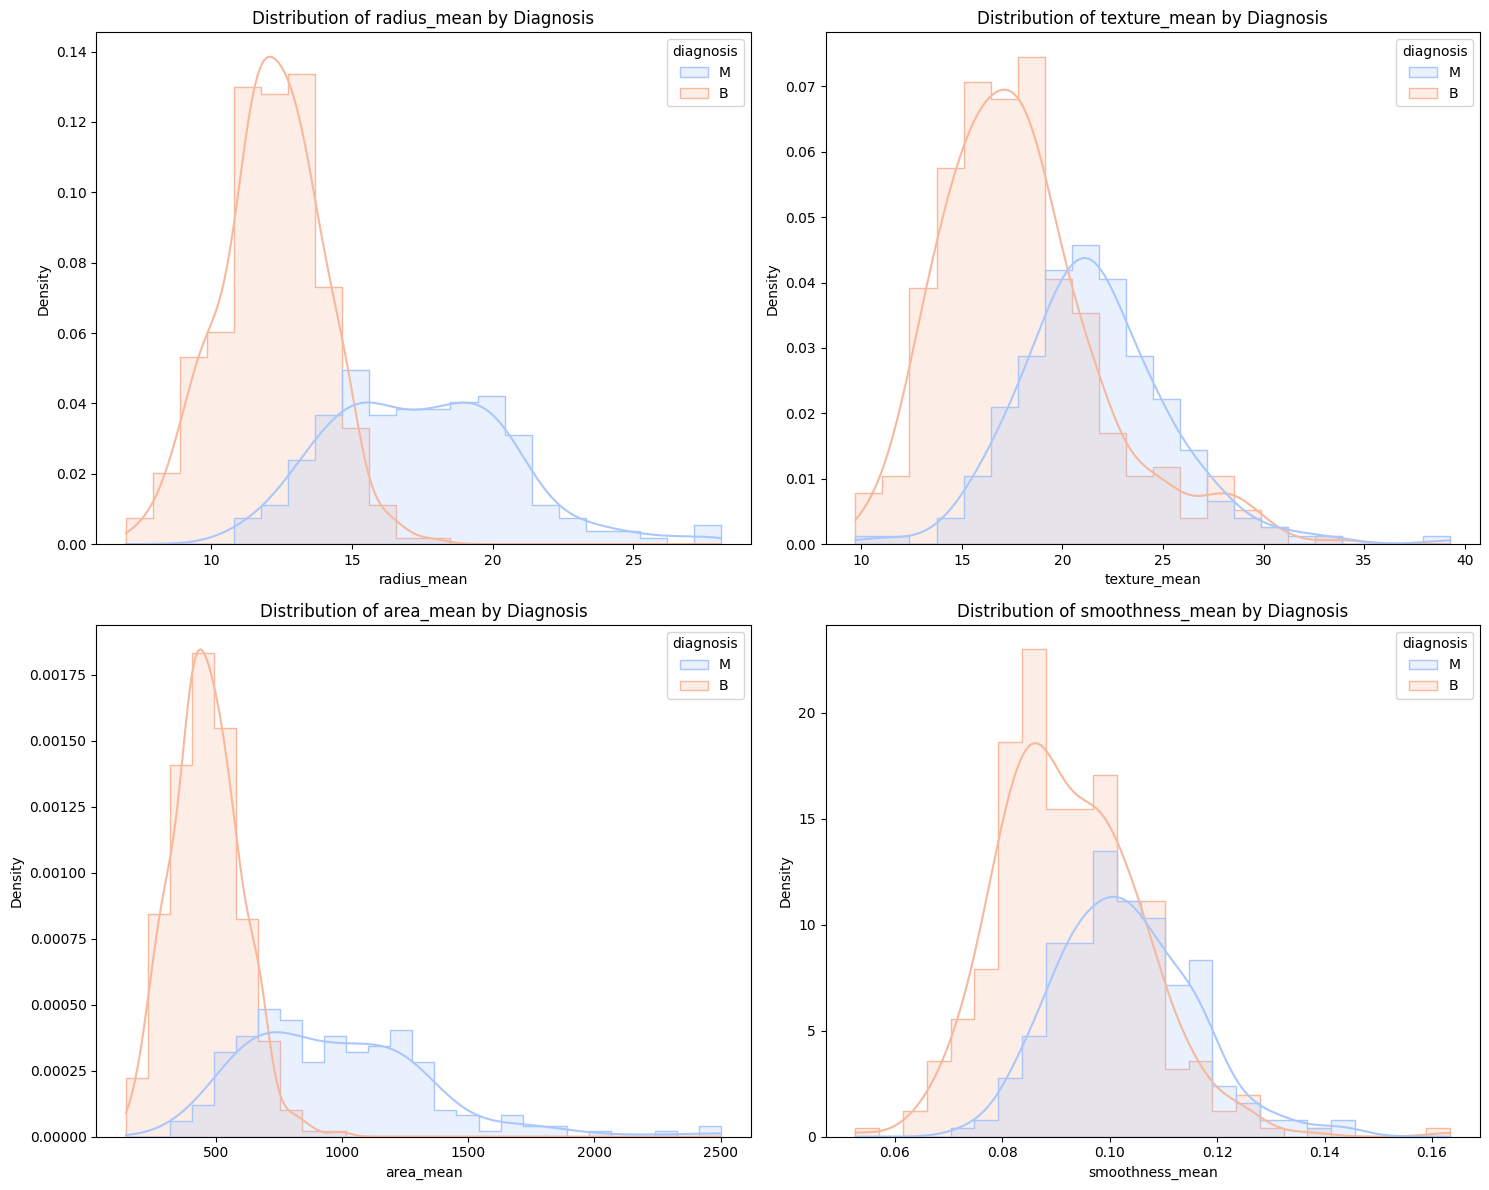

In [12]:
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette="coolwarm", element="step", stat="density")
    plt.title(f'Distribution of {feature} by Diagnosis')
plt.tight_layout()
plt.show()

In [13]:
import plotly.express as px
numeric_df = df.select_dtypes(include=['number'])
# Compute correlation matrix
corr_matrix = numeric_df.corr().round(2)
# Create interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    aspect='auto',
    title="Interactive Correlation Heatmap"
)
fig.update_layout(width=1000, height=800)
fig.show()

# Drop the unnecessary columns which are not useful for training

for identify the unrelevent colums we use the coorelation matrix

In [14]:
drop_columns = [
    'perimeter_mean', 'area_mean',
    'concavity_mean', 'concave points_mean',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
    'perimeter_se', 'area_se'
]
df = df.drop(drop_columns, axis=1)

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [16]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the dataset into train and test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit the train data in the Logistic Regression model

In [18]:
# Create and train the model
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

# predict the unseen data using the trained Logistic model

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B']


# evaluate the model

evaluate the model using precision recall and roc-curve .our model will have the accuracy of 92

In [21]:
print(accuracy_score(y_test,y_pred))

0.9298245614035088


<Figure size 500x400 with 0 Axes>

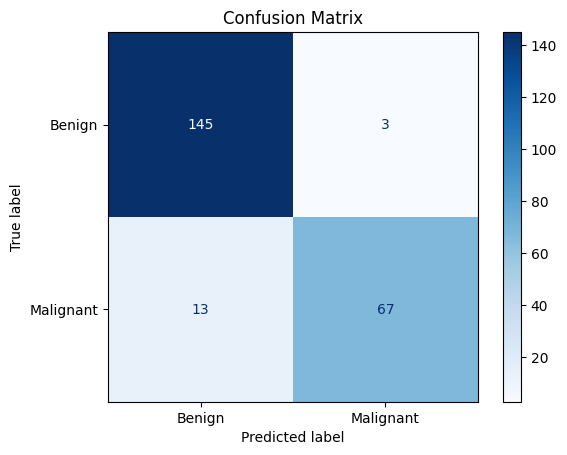

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(5, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [24]:
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.96
Recall: 0.84


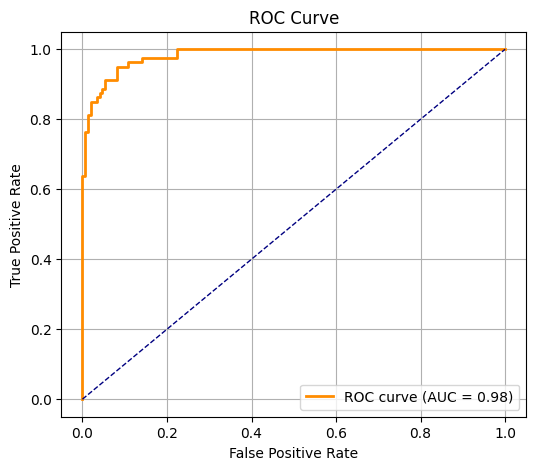

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_test_binary = (y_test == 'M').astype(int)
y_pred_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_probs)
roc_auc = roc_auc_score(y_test_binary, y_pred_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Thresold Tuning

In [27]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
thresholds = np.arange(0.0, 1.01, 0.05)
print("Threshold | Precision | Recall")
for t in thresholds:
    y_pred_class = (y_pred_probs > t).astype(int)
    precision = precision_score(y_test_binary, y_pred_class)
    recall = recall_score(y_test_binary, y_pred_class)
    print(f"{t:.2f}       | {precision:.2f}      | {recall:.2f}")

Threshold | Precision | Recall
0.00       | 0.35      | 1.00
0.05       | 0.36      | 1.00
0.10       | 0.41      | 1.00
0.15       | 0.48      | 1.00
0.20       | 0.55      | 1.00
0.25       | 0.64      | 1.00
0.30       | 0.72      | 0.97
0.35       | 0.83      | 0.96
0.40       | 0.87      | 0.91
0.45       | 0.92      | 0.86
0.50       | 0.96      | 0.84
0.55       | 0.98      | 0.76
0.60       | 0.98      | 0.72
0.65       | 0.98      | 0.65
0.70       | 1.00      | 0.56
0.75       | 1.00      | 0.50
0.80       | 1.00      | 0.44
0.85       | 1.00      | 0.40
0.90       | 1.00      | 0.34
0.95       | 1.00      | 0.16
1.00       | 0.00      | 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



# Sigmoid Function

**A logistic regression model is designed to output values between 0 and 1, which can be interpreted as probabilities. This is achieved by using a special mathematical function called the sigmoid function, also known as the logistic function.**

📘 Sigmoid Function Formula
The sigmoid function is defined as:

[ \sigma(z) = \frac{1}{1 + e^{-z}} ]